In [9]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


df = pd.read_csv("listings.csv")
df.isna().sum()

id                                    0
name                                 38
host_id                               0
host_name                             4
neighbourhood_group               20030
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2406
reviews_per_month                  2406
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Processing the Data

In [10]:
X = df[['neighbourhood',
        'room_type',
        'price',
        'minimum_nights',
        'number_of_reviews',
        'availability_365',
        'calculated_host_listings_count']]
LE = LabelEncoder()
cat = ['neighbourhood','room_type']

X[cat] = X[cat].apply(LE.fit_transform)
X.head()

C:\Users\bhoga\AppData\Local\Temp\ipykernel_18492\2815103831.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat] = X[cat].apply(LE.fit_transform)


,neighbourhood,room_type,price,minimum_nights,number_of_reviews,availability_365,calculated_host_listings_count
0,14,1,59,3,248,44,1
1,20,0,160,4,42,47,1
2,4,0,80,1,233,198,2
3,5,0,125,14,1,141,2
4,5,1,150,2,171,199,1


### Searching for K Means Cluster Elbow

C:\Users\bhoga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhoga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhoga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhoga\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

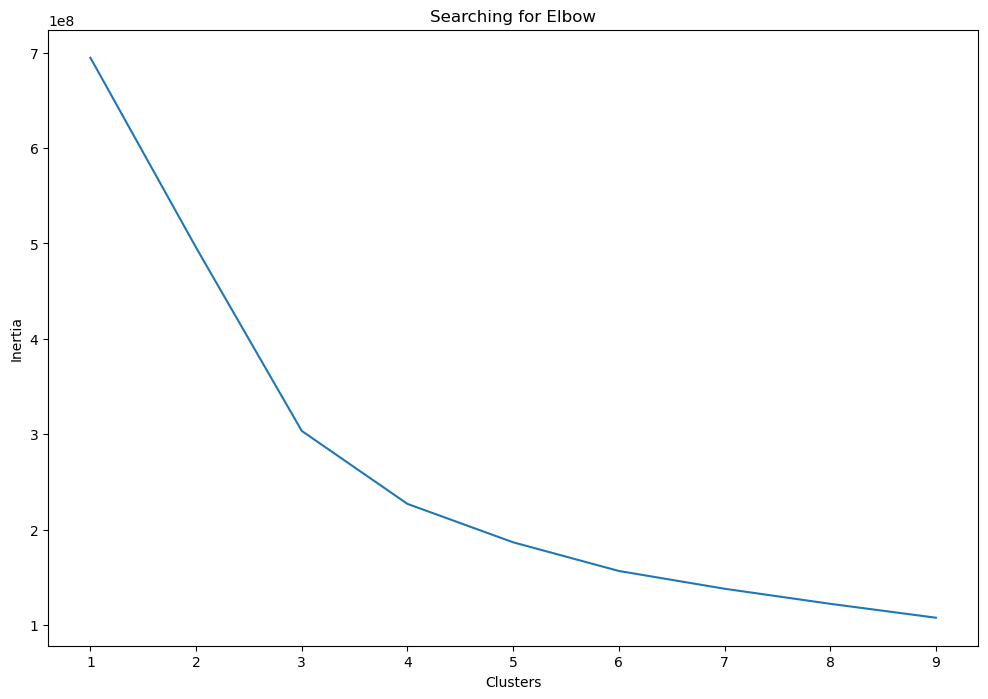

In [11]:
clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
 
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia');

In [15]:
def calcKMeans(arg1, arg2, arg3, arg4, arg5, arg6, arg7, arg8):
    from sklearn.preprocessing import LabelEncoder
    from sklearn.cluster import KMeans
    import numpy as np

    LE = LabelEncoder()
    neighbourhood = LE.fit_transform(arg1)
    room_type = LE.fit_transform(arg2)

    price = arg3
    minimum_nights = arg4
    number_of_reviews = arg5
    availability_365 = arg6
    calculated_host_listings_count = arg7

    N = arg8

    X = np.column_stack(
        [
            neighbourhood,
            room_type,
            price,
            minimum_nights,
            number_of_reviews,
            availability_365,
            calculated_host_listings_count,
        ]
    )

    kmeans = KMeans(n_clusters=N, random_state=35)
    return kmeans.fit_predict(X).tolist()

In [16]:
from tabpy.tabpy_tools.client import Client

client = Client('http://localhost:9004/')

client.deploy('KMeans',
              calcKMeans,
              'Air BnB K Means',override=True)